# IBM HR Analytics

## Dataset: [IBM HR Analytics Attrition Dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

### Import all the necessary header files as follows:

**pandas** : An open source library used for data manipulation, cleaning, analysis and visualization. <br>
**numpy** : A library used to manipulate multi-dimensional data in the form of numpy arrays with useful in-built functions. <br>
**matplotlib** : A library used for plotting and visualization of data. <br>
**seaborn** : A library based on matplotlib which is used for plotting of data. <br>
**sklearn.metrics** : A library used to calculate the accuracy, precision and recall. <br>
**sklearn.preprocessing** : A library used to encode and onehotencode categorical variables. <br>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### Read the data from the dataset using the read_csv() function from the pandas library.

In [2]:
# Importing the dataset
data = pd.read_csv("Employee-Attrition.csv")

### Inspecting and cleaning the data

In [3]:
# Printing the 1st 5 columns
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Printing the dimensions of data
data.shape

(1470, 35)

In [5]:
# Viewing the column heading
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Inspecting the target variable
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
# Identifying the unique number of values in the dataset
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
# Here the value for columns, Over18, StandardHours and EmployeeCount are same for all rows, we can eliminate these columns
data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1, inplace=True)

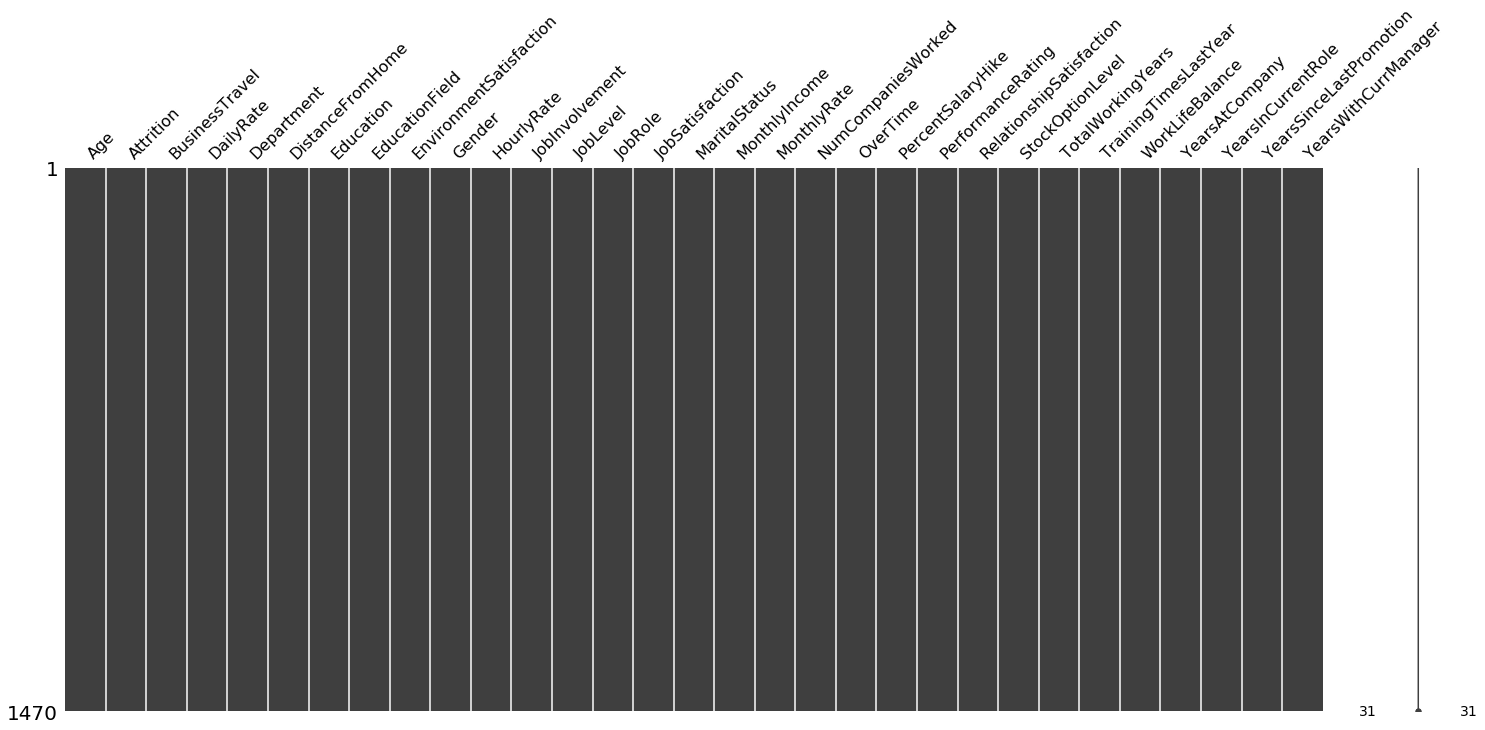

In [9]:
import missingno as msno
# Missing data in form of white lines 
msno.matrix(data)
plt.show()

In [10]:
# Viewing the data statistics
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Data Visualization

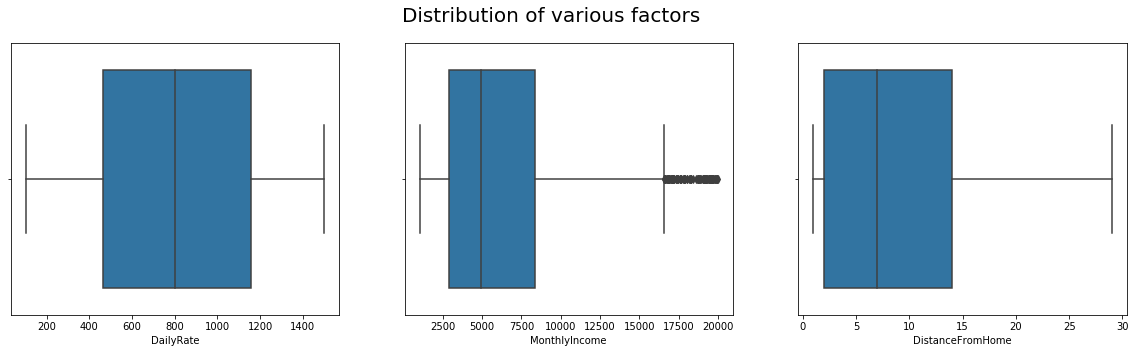

In [11]:
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(1,3, figsize=(20,5))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.boxplot(data['DailyRate'], ax = ax[0]) 
sns.boxplot(data['MonthlyIncome'], ax = ax[1]) 
sns.boxplot(data['DistanceFromHome'], ax = ax[2])  
plt.show()

F:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


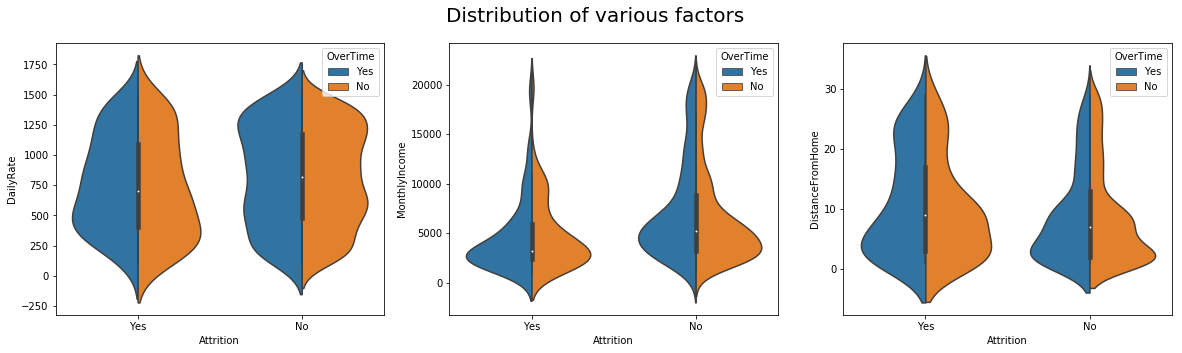

In [12]:
# Plotting a violinplot to study the distribution of features
fig,ax = plt.subplots(1,3, figsize=(20,5))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.violinplot(x="Attrition", y="DailyRate", hue="OverTime", data=data, split=True, ax = ax[0]) 
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="OverTime", data=data, split=True, ax = ax[1]) 
sns.violinplot(x="Attrition", y="DistanceFromHome", hue="OverTime", data=data, split=True, ax = ax[2]) 
plt.show()

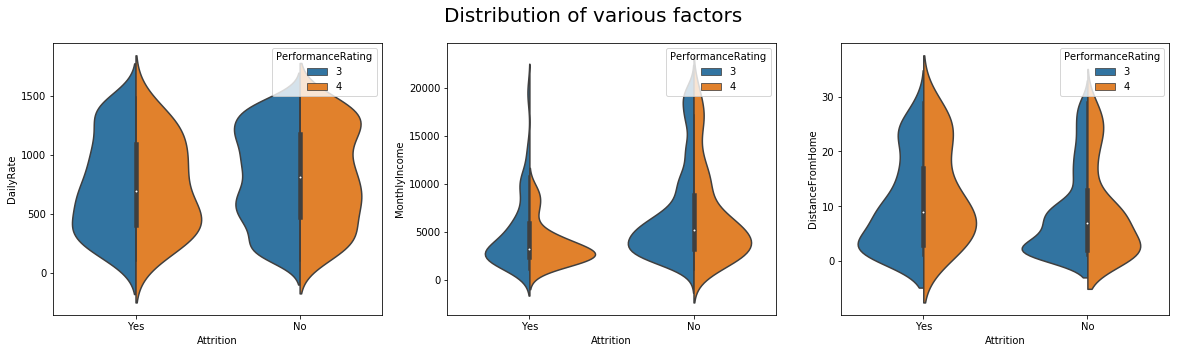

In [13]:
# Plotting a violinplot to study the distribution of features
fig,ax = plt.subplots(1,3, figsize=(20,5))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.violinplot(x="Attrition", y="DailyRate", hue="PerformanceRating", data=data, split=True, ax = ax[0]) 
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="PerformanceRating", data=data, split=True, ax = ax[1]) 
sns.violinplot(x="Attrition", y="DistanceFromHome", hue="PerformanceRating", data=data, split=True, ax = ax[2]) 
plt.show()

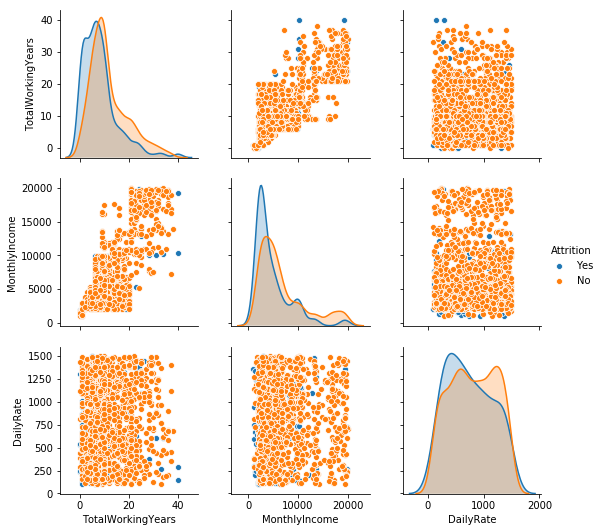

In [14]:
# Plotting bivariate relations between each pair of features with hue = "Attrition"
sns.pairplot(data, hue="Attrition", vars = ["TotalWorkingYears", "MonthlyIncome", "DailyRate"])
plt.show()

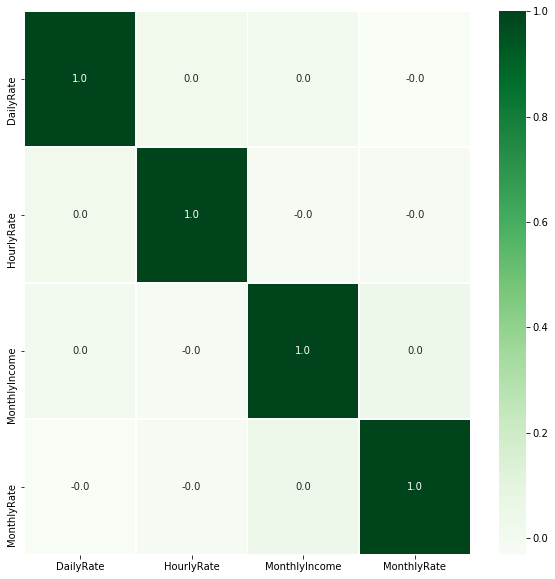

In [15]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

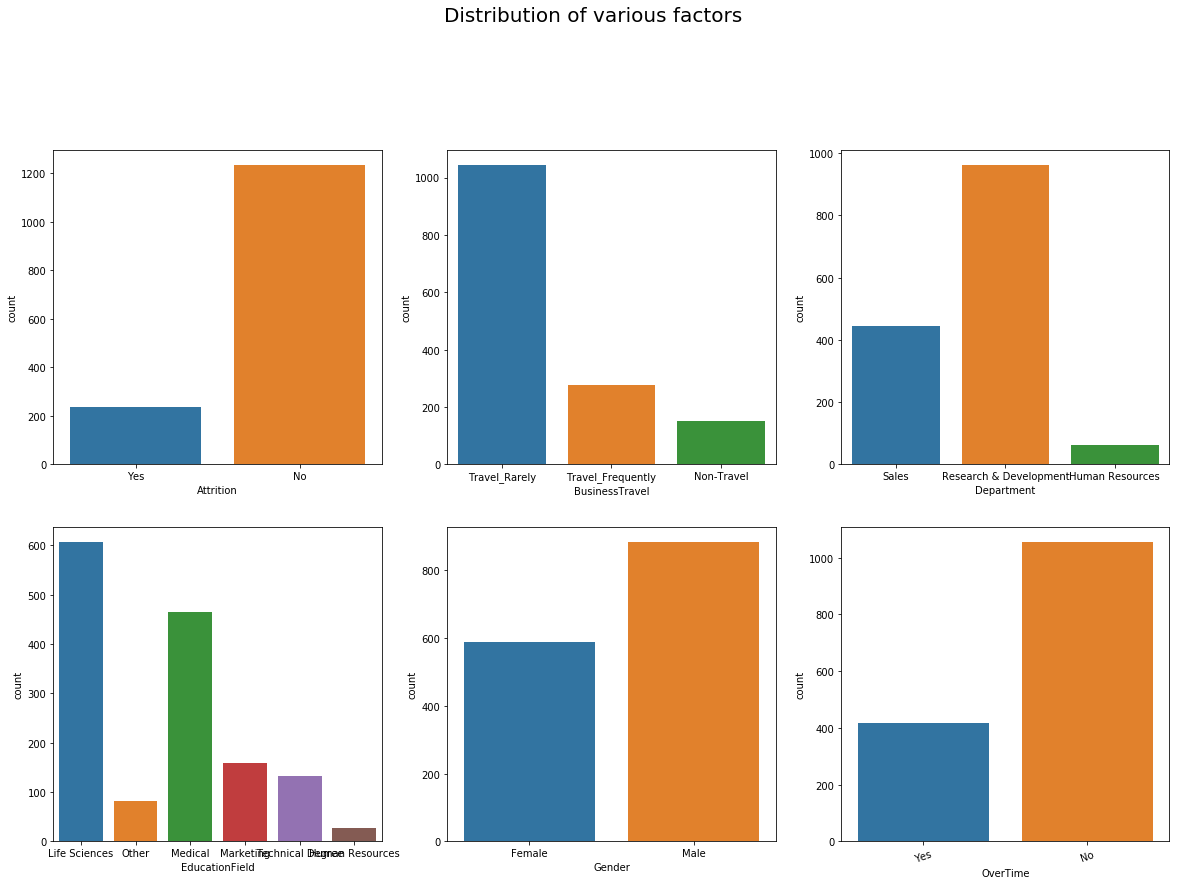

In [16]:
# Plotting countplots for the categorical variables
fig,ax = plt.subplots(2,3, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(data['Attrition'], ax = ax[0,0]) 
sns.countplot(data['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(data['Department'], ax = ax[0,2]) 
sns.countplot(data['EducationField'], ax = ax[1,0])
sns.countplot(data['Gender'], ax = ax[1,1])  
sns.countplot(data['OverTime'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

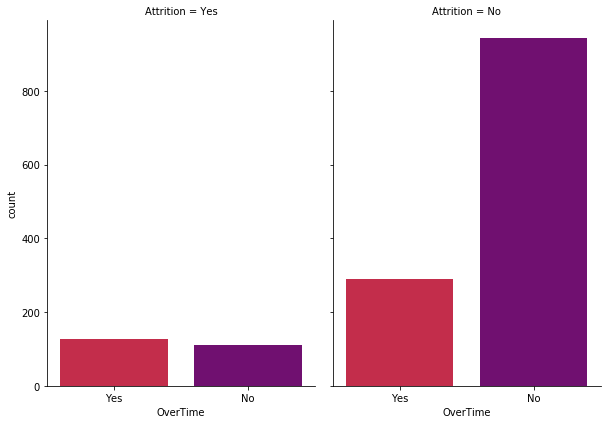

In [17]:
sns.catplot(x="OverTime", col="Attrition", data=data , kind="count", height=6, aspect=.7, palette=['crimson','purple'])
plt.show()

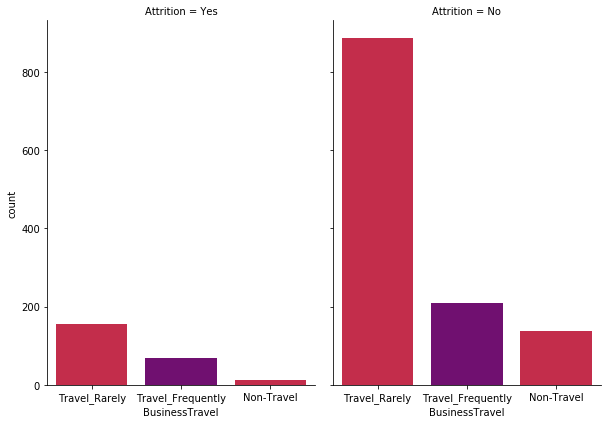

In [18]:
sns.catplot(x="BusinessTravel", col="Attrition", data=data , kind="count", height=6, aspect=.7, palette=['crimson','purple'])
plt.show()

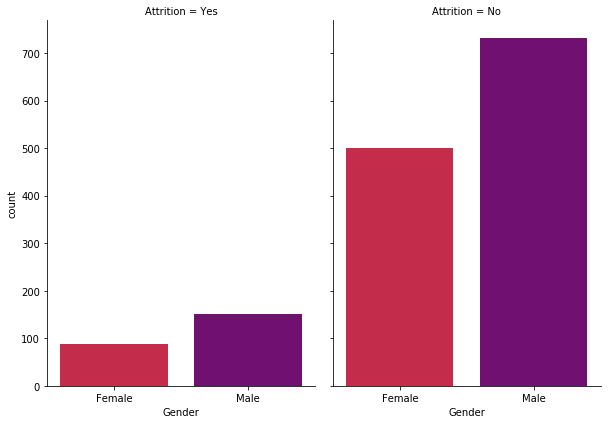

In [19]:
sns.catplot(x="Gender", col="Attrition", data=data , kind="count", height=6, aspect=.7, palette=['crimson','purple'])
plt.show()

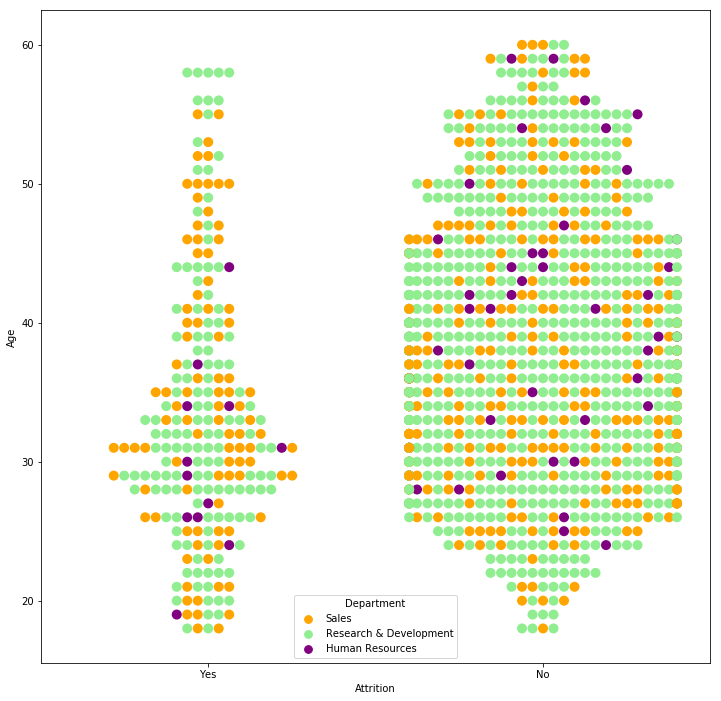

In [20]:
plt.figure(figsize=(12,12))
sns.swarmplot(x="Attrition",y="Age",hue='Department',data=data,size=10 ,palette=['orange','lightgreen','purple'])
plt.show()

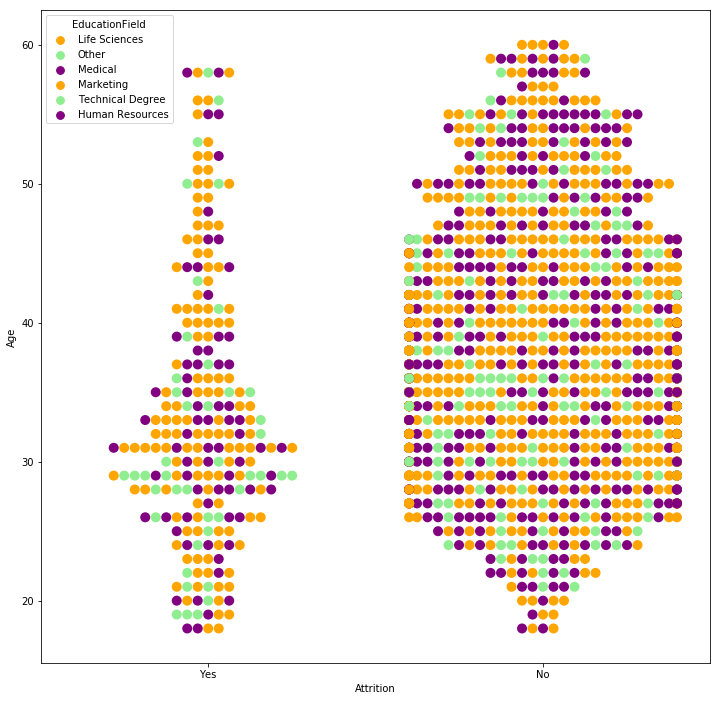

In [21]:
plt.figure(figsize=(12,12))
sns.swarmplot(x="Attrition",y="Age",hue='EducationField',data=data,size=10 ,palette=['orange','lightgreen','purple'])
plt.show()

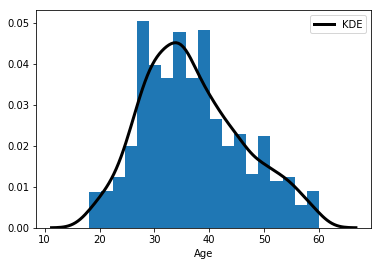

In [22]:
sns.distplot(data['Age'],hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.show()

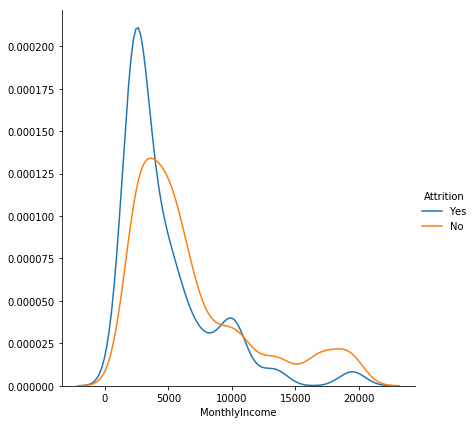

In [23]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(data, hue="Attrition", height=6).map(sns.kdeplot, "MonthlyIncome").add_legend()
plt.show()

In [24]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(23, 23)

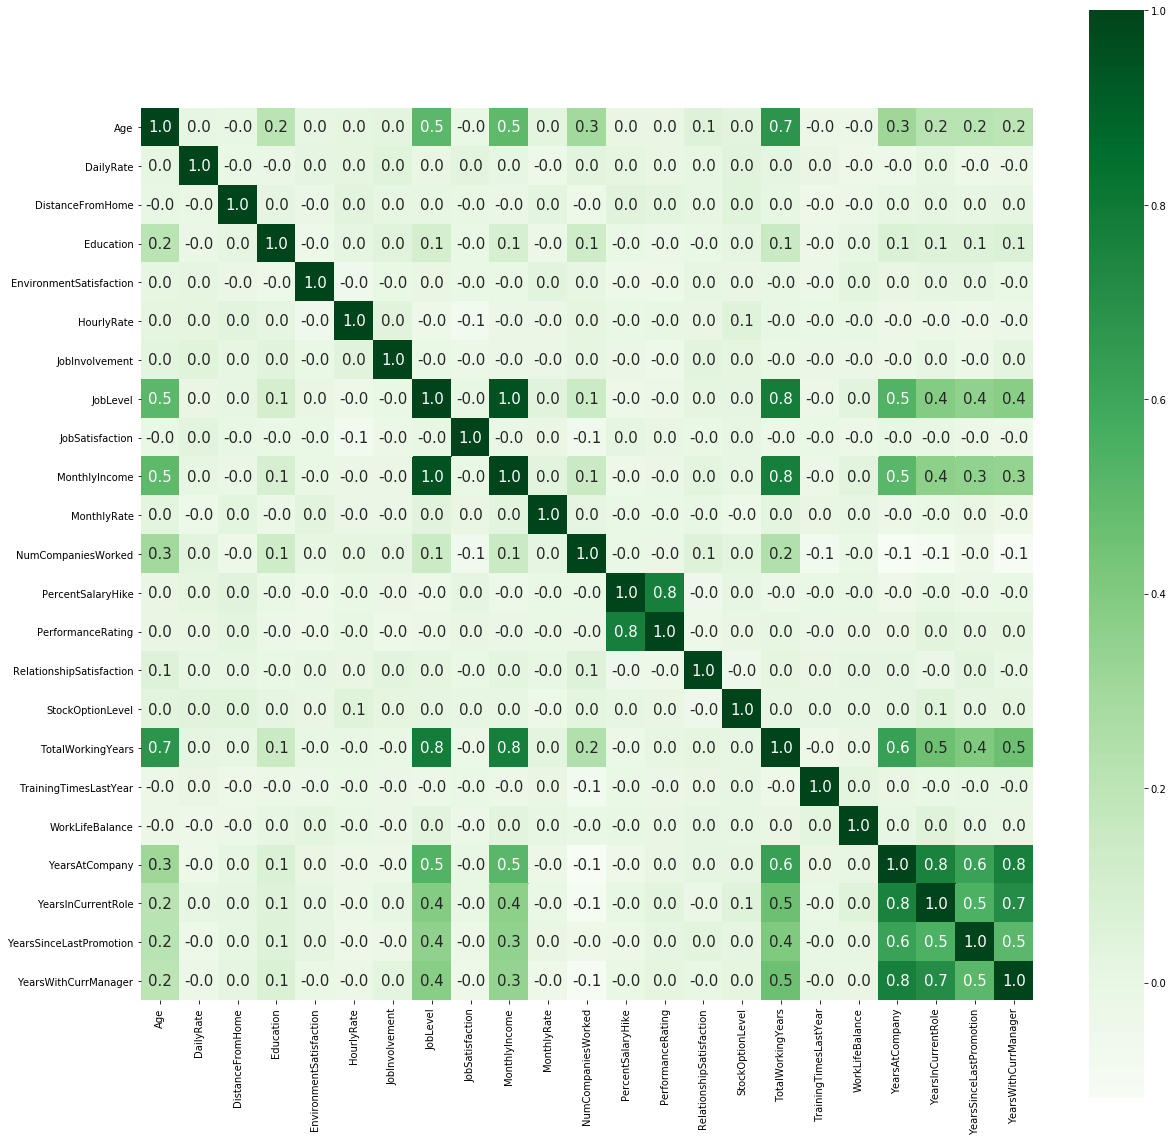

In [25]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [26]:
# Combine levels in a categorical variable by seeing their distribution
JobRoleCrossTab = pd.crosstab(data['JobRole'], data['Attrition'], margins=True)
JobRoleCrossTab

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [27]:
JobRoleCrossTab.div(JobRoleCrossTab["All"], axis=0)

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,0.931298,0.068702,1.0
Human Resources,0.769231,0.230769,1.0
Laboratory Technician,0.760618,0.239382,1.0
Manager,0.950980,0.049020,1.0
Manufacturing Director,0.931034,0.068966,1.0
Research Director,0.975000,0.025000,1.0
Research Scientist,0.839041,0.160959,1.0
Sales Executive,0.825153,0.174847,1.0
Sales Representative,0.602410,0.397590,1.0


In [28]:
# Combining job roles with high similarities together
data['JobRole'].replace(['Human Resources','Laboratory Technician'],value= 'HR-LT',inplace = True)
data['JobRole'].replace(['Research Scientist','Sales Executive'],value= 'RS-SE',inplace = True)
data['JobRole'].replace(['Healthcare Representative','Manufacturing Director'],value= 'HE-MD',inplace = True)

In [29]:
# Encoding Yes / No values in Attrition column to 1 / 0
data.Attrition.replace(["Yes","No"],[1,0],inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [30]:
# One hot encoding for categorical variables
final_data = pd.get_dummies(data)
final_data.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1,0,1,0,0
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobSatisfaction,4,2,3,3,2


In [31]:
final_data.shape

(1470, 49)

#### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [32]:
# Spliting target variable and independent variables
X = final_data.drop(['Attrition'], axis = 1)
y = final_data['Attrition']

In [33]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0, stratify=y)

In [34]:
y_train.value_counts()

0    924
1    178
Name: Attrition, dtype: int64

In [35]:
# Checking distribtution of Target varaible in training set
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])*100

16.152450090744104

In [36]:
y_test.value_counts()

0    309
1     59
Name: Attrition, dtype: int64

In [37]:
# Checking distribtution of Target varaible in test set
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])*100

16.032608695652172

### Logistic Regression

In [38]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [40]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  87.77
Precision :  81.82
Recall :  30.51


In [41]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

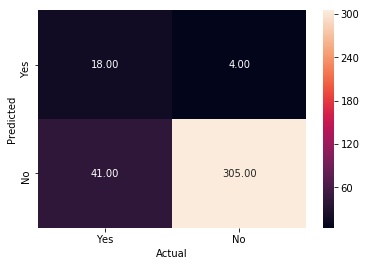

In [42]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### Gaussian Naive Bayes

In [43]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
# Prediction on test set
y_pred = model.predict(X_test)

In [45]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  80.71
Precision :  43.18
Recall :  64.41


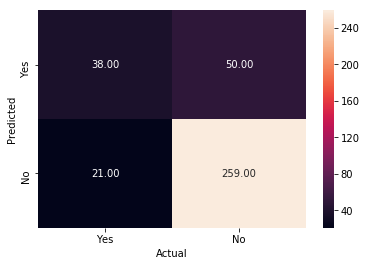

In [46]:
# Confusion matrix 
draw_cm(y_test, y_pred)

### Decision Tree Classifier

In [47]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [49]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


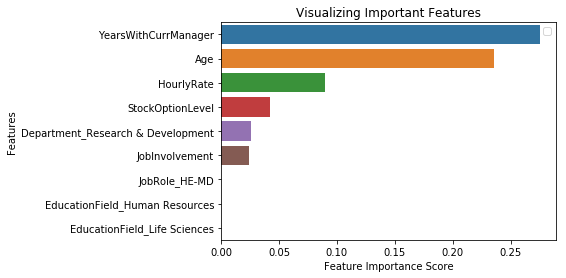

In [50]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [51]:
# Prediction on test set
y_pred = clf.predict(X_test)

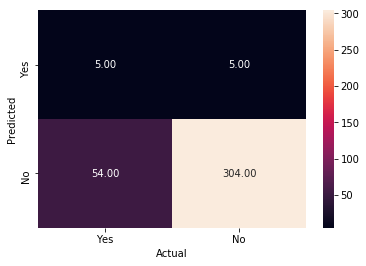

In [52]:
# Confusion matrix
draw_cm(y_test, y_pred)

In [53]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  83.97
Precision :  50.0
Recall :  8.47


### Random Forest Classifier

In [54]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

No handles with labels found to put in legend.


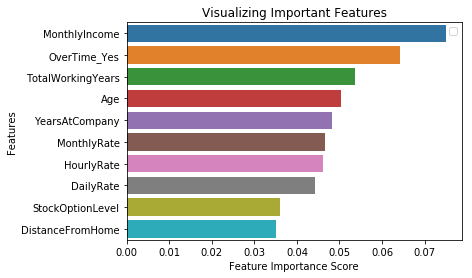

In [55]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [56]:
# Prediction on test data
y_pred = rf.predict(X_test)

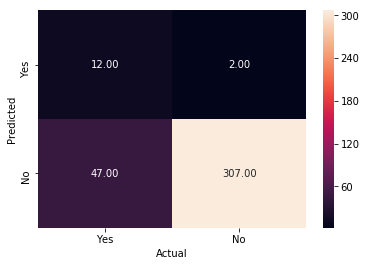

In [57]:
# Confusion metrix
draw_cm(y_test, y_pred)

In [58]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100 , 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  86.68
Precision :  85.71
Recall :  20.34


### Support Vector Machine Classifier

In [59]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

F:\Installed\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Installed\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\Installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys


In [60]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
# Prediction on test data
y_pred = svc.predict(X_test)

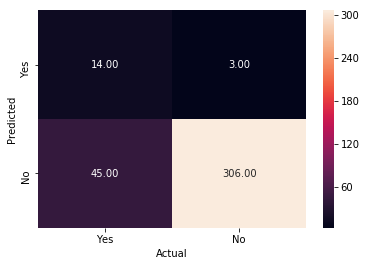

In [62]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [63]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  86.96
Precision :  82.35
Recall :  23.73


### K - Nearest Neighbors

In [64]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [65]:
# Prediction on test data
y_pred = knn.predict(X_test)

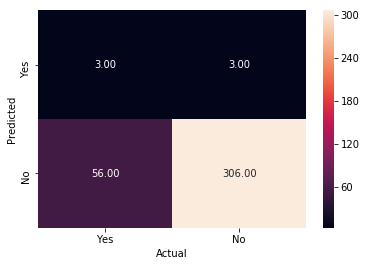

In [66]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [67]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  83.97
Precision :  50.0
Recall :  5.08


## Evaluation and comparision of all the models

In [68]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,87.77
4,Support Vector Machines,86.96
3,Random Forest,86.68
2,Decision Tree,83.97
5,K - Nearest Neighbors,83.97
1,Naive Bayes,80.71
